<a href="https://colab.research.google.com/github/PratibhaPachare/TASK-7/blob/main/TASK7_Assignment16(RandomForest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [ ]:
# Importing necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")

**Importing the dataset**

In [ ]:
# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/CSV FILES/TASK7/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Information of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
# Descriptive statistics of the Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [ ]:
# Checking for duplicate rows.
df.duplicated().sum()

0

In [ ]:
# Count of values in 'Purchased' column
print(f"Count of values in 'Purchased' column:\n{Counter(df.Purchased)}")

Count of values in 'Purchased' column:
Counter({0: 257, 1: 143})


In [ ]:
# Compute a simple cross-tabulation of two (or more) factors. 
# By default computes a frequency table of the factors 
pd.crosstab(df.Gender,df.Purchased)

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


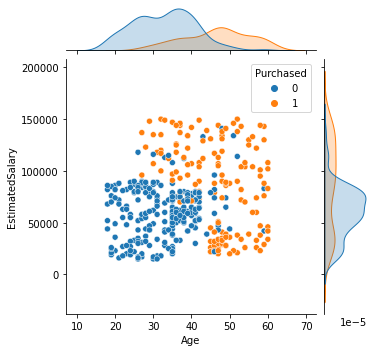

In [ ]:
# jointplot()
sns.jointplot(x='Age',y='EstimatedSalary', hue = 'Purchased', data=df, height=5, kind= 'scatter')
plt.show()

**Splitting the dataset into the Training set and Test set**

In [ ]:
# Splitting the dataset into Training Dataset and Testing Dataset.
X = df.iloc[:, [2, 3]]
y = df.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=1,stratify=df['Purchased'])

**Feature Scaling**

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting Random Forest to the Training set**

In [ ]:
# Building a Random Forest Classifier model and fitting it.
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

**Predicting the Test set results**

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)

**Making the Confusion Matrix**

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[77,  8],
       [ 8, 39]])

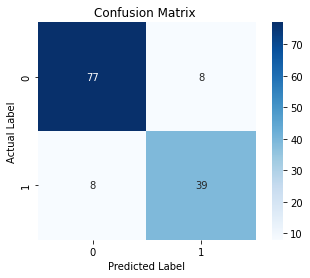

In [ ]:
# Create heatmap
sns.heatmap(cm, annot=True, square=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [ ]:
# Classification Report
print('Classification Report of the Decision Tree Model:\n') 
print(classification_report(y_test, y_pred))

Classification Report of the Decision Tree Model:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        85
           1       0.83      0.83      0.83        47

    accuracy                           0.88       132
   macro avg       0.87      0.87      0.87       132
weighted avg       0.88      0.88      0.88       132



**Visualising the Training set results**

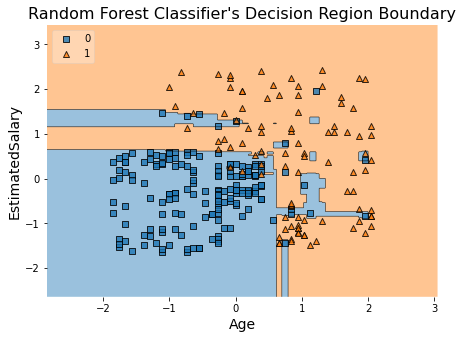

In [ ]:
# Decision Boundary-->Visualizing the Train set results
plt.figure(figsize=(7,5))
plot_decision_regions(X_train, y_train.values, clf=model, legend=2)
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('Random Forest Classifier\'s Decision Region Boundary', size=16)
plt.show()

**Visualising the Test set results**

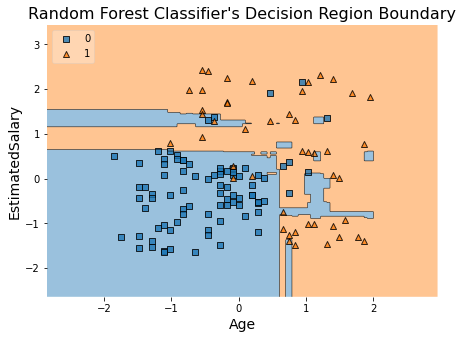

In [ ]:
# Decision Boundary-->Visualizing the Test set results
plt.figure(figsize=(7,5))
plot_decision_regions(X_test, y_test.values, clf=model, legend=2)
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('Random Forest Classifier\'s Decision Region Boundary', size=16)
plt.show()

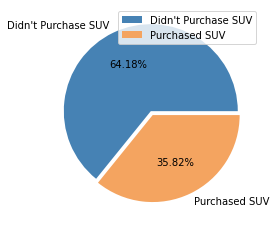

In [ ]:
# Piechart w.r.t actual target
label=["Didn't Purchase SUV","Purchased SUV"]
mycolors = ["steelblue", "sandybrown"]
myexplode = [0.05, 0]
z1 = y_train.value_counts()
plt.pie(z1, autopct="%.2f%%",labels=label, 
        explode=myexplode, colors = mycolors)
plt.legend()
plt.show()

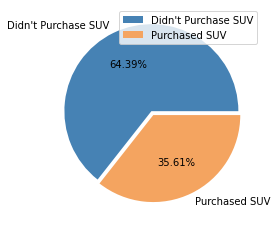

In [ ]:
# Piechart w.r.t Predicted values of target
label=["Didn't Purchase SUV","Purchased SUV"]
mycolors = ["steelblue", "sandybrown"]
myexplode = [0.05, 0]
z2 = pd.Series(y_pred).value_counts()
plt.pie(z2, autopct="%.2f%%",labels=label, 
        explode=myexplode, colors = mycolors)
plt.legend()
plt.show()

The percentages of class 0 and class 1 in Actual values and Predicted values are almost the same.